In [1]:
from metrics import BinaryMetrics
import torch
import cv2
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import seaborn as sns

from utils import generate_mask

In [2]:
df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))
df = df[df["sensor"] == "rgb_highres_center"]

C:\Users\atkovacs\AppData\Local\Temp\ipykernel_11744\5639941.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df = pd.read_json(max(glob("./dataframe_dumps/df_eda_*"), key=os.path.getmtime))


In [3]:
pred = df.sample(1)

target = []
for i in range(5):
    target.append(df.sample(1))

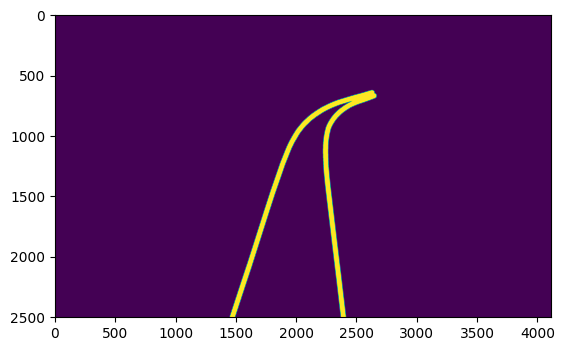

In [4]:
pred_mask = cv2.cvtColor(generate_mask(df, pred.path.values[0]), cv2.COLOR_BGR2GRAY)
target_mask = []

for i in range(len(target)):
    target_mask.append(
        cv2.cvtColor(generate_mask(df, target[i].path.values[0]), cv2.COLOR_BGR2GRAY)
    )

plt.imshow(pred_mask)

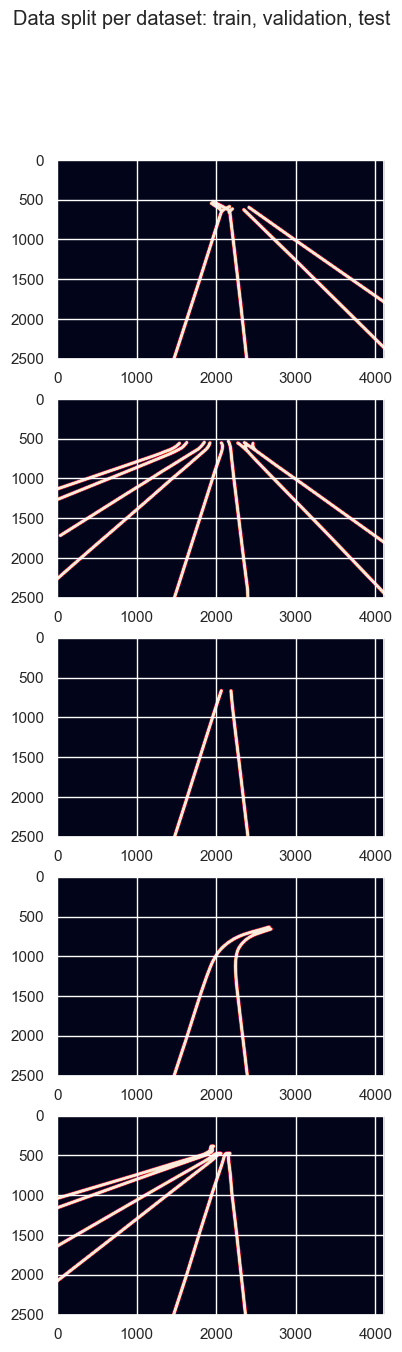

In [5]:
sns.set(rc={"figure.figsize": (15, 15)})

fig, ax = plt.subplots(len(target_mask))
fig.suptitle("Data split per dataset: train, validation, test")

for i in range(len(target_mask)):
    ax[i].imshow(target_mask[i])

In [6]:
transform = transforms.Compose([transforms.ToTensor()])

In [7]:
pred_tensor = transform(pred_mask)
pred_tensor = pred_tensor[None, :]
pred_tensor.shape

torch.Size([1, 1, 2504, 4112])

In [8]:
target_tensor = []
for i in range(len(target_mask)):
    tmp = transform(target_mask[i])
    target_tensor.append(tmp[None, :])
    print(target_tensor[-1].shape)

torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])
torch.Size([1, 1, 2504, 4112])


In [9]:
bm = BinaryMetrics()

In [10]:
for i in range(len(target_tensor)):
    pixel_acc, dice, precision, specificity, recall, f1_score = bm(
        y_pred=pred_tensor, y_true=target_tensor[i]
    )
    print(
        f"pixel_acc: {pixel_acc}\ndice: {dice}\nprecision: {precision}\nspecificity: {specificity}\nrecall: {recall}\nf1_score: {f1_score}"
    )
    print("+++++++++++++++++++")

pixel_acc: 0.9692937731742859
dice: 0.4466438889503479
precision: 0.6765123605728149
specificity: 0.9938455820083618
recall: 0.3333699107170105
f1_score: 0.4466494023799896
+++++++++++++++++++
pixel_acc: 0.9333018660545349
dice: 0.2596586048603058
precision: 0.6385239362716675
specificity: 0.9928665161132812
recall: 0.16296440362930298
f1_score: 0.25966784358024597
+++++++++++++++++++
pixel_acc: 0.9882177710533142
dice: 0.6546654105186462
precision: 0.6096760630607605
specificity: 0.9927352666854858
recall: 0.7068235278129578
f1_score: 0.6546680331230164
+++++++++++++++++++
pixel_acc: 0.9996111989021301
dice: 0.9894733428955078
precision: 0.9974815845489502
specificity: 0.9999529719352722
recall: 0.9815927147865295
f1_score: 0.9894734621047974
+++++++++++++++++++
pixel_acc: 0.9435907602310181
dice: 0.2278275340795517
precision: 0.4542919397354126
specificity: 0.9894248843193054
recall: 0.1520370990037918
f1_score: 0.22784027457237244
+++++++++++++++++++
